In [1]:
from data import generate_dataset
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression       



n = 1000

x, y, y_noisy1 = generate_dataset(n=n, noise_std=0.5, random_state=1)
_, _, y_noisy2 = generate_dataset(n=n, noise_std=1.0, random_state=1)
_, _, y_noisy3 = generate_dataset(n=n, noise_std=2.0, random_state=1)
_, _, y = generate_dataset(n=n, noise_std=0, random_state=1)


In [2]:

def design_matrix(x, degree):
    return np.vstack([x**i for i in range(degree+1)]).T

def mse(y, y_hat):
    return np.mean((y - y_hat)**2)

def r2(y, y_hat):
    return 1 - np.sum((y - y_hat)**2) / np.sum((y - np.mean(y))**2)

x_train, x_test = train_test_split(x, test_size=0.2, random_state=42)


_, _, y1_train, y1_test = train_test_split(x, y_noisy1, test_size=0.2, random_state=42)
_, _, y2_train, y2_test = train_test_split(x, y_noisy2, test_size=0.2, random_state=42)
_, _, y3_train, y3_test = train_test_split(x, y_noisy3, test_size=0.2, random_state=42)
_, _, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.reshape(-1, 1)).flatten()
x_test_scaled = scaler.transform(x_test.reshape(-1, 1)).flatten()

    Degree     Error    Bias^2  Variance
0        1  0.308198  0.307395  0.000803
1        2  0.271873  0.270889  0.000984
2        3  0.272292  0.270994  0.001298
3        4  0.250371  0.248846  0.001525
4        5  0.251401  0.249447  0.001954
5        6  0.243388  0.241198  0.002189
6        7  0.243453  0.241151  0.002302
7        8  0.240332  0.237658  0.002674
8        9  0.242926  0.239881  0.003045
9       10  0.239289  0.235955  0.003334
10      11  0.239664  0.236344  0.003320
11      12  0.239345  0.235730  0.003615
12      13  0.240607  0.236370  0.004237
13      14  0.240636  0.236000  0.004636
14      15  0.240626  0.235843  0.004782


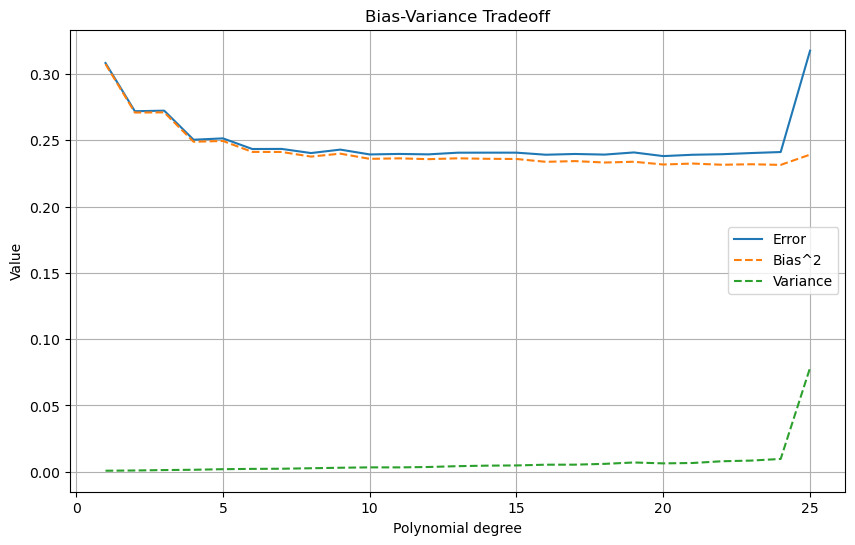

In [6]:


def bias_variance_analysis(x_train, y_train, x_test, y_test, degrees, n_bootstraps=100):

    rng = np.random.RandomState(42)
    results = []


    for d in degrees:
        
        y_pred = np.empty((y_test.shape[0], n_bootstraps))

        for i in range(n_bootstraps):
            x_, y_ = resample(x_train, y_train)
            model = make_pipeline(PolynomialFeatures(degree=d), LinearRegression())
            y_pred[:, i] = model.fit(x_[:, np.newaxis], y_).predict(x_test[:, np.newaxis])

    
        error = np.mean((y_test[:, np.newaxis] - y_pred) ** 2)
        bias2 = np.mean((y_test - np.mean(y_pred, axis=1)) ** 2)
        variance = np.mean(np.var(y_pred, axis=1))

        results.append([d, error, bias2, variance])

    df = pd.DataFrame(results, columns=["Degree", "Error", "Bias^2", "Variance"])
    return df



degrees = range(1,26)
df_bv = bias_variance_analysis(x_train, y1_train, x_test, y1_test, degrees, n_bootstraps=100)

print(df_bv.head(15))


plt.figure(figsize=(10,6))
plt.plot(df_bv["Degree"], df_bv["Error"], label="Error")
plt.plot(df_bv["Degree"], df_bv["Bias^2"],"--", label="Bias^2")
plt.plot(df_bv["Degree"], df_bv["Variance"],"--", label="Variance")
plt.xlabel("Polynomial degree")
plt.ylabel("Value")
plt.title("Bias-Variance Tradeoff")
plt.legend()
plt.grid(True)
plt.show()

